# BIVE, QUIZ 2

In [437]:
#Gather the stock market data of Universal Robina Corporation at Yahoo Finances
import yfinance as yf
UR_corp = 'UVRBF'
#Taking the two-year historical data of URC stocks
UR_stocks = yf.download(tickers=UR_corp, period='2y', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [438]:
#Start of dataset
UR_stocks.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-12 00:00:00-04:00,2.61,2.61,2.61,2.61,2.462778,0
2020-10-13 00:00:00-04:00,2.61,2.61,2.61,2.61,2.462778,0
2020-10-14 00:00:00-04:00,2.79,2.79,2.79,2.79,2.632624,3500
2020-10-15 00:00:00-04:00,2.79,2.79,2.79,2.79,2.632624,0
2020-10-16 00:00:00-04:00,2.79,2.79,2.79,2.79,2.632624,0


In [439]:
#End of dataset
UR_stocks.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-04 00:00:00-04:00,1.86,1.86,1.86,1.86,1.86,0
2022-10-05 00:00:00-04:00,1.86,1.86,1.86,1.86,1.86,0
2022-10-06 00:00:00-04:00,1.86,1.86,1.86,1.86,1.86,0
2022-10-07 00:00:00-04:00,1.80,1.80,1.80,1.80,1.80,100
2022-10-10 00:00:00-04:00,1.80,1.80,1.80,1.80,1.80,0


In [440]:
len(UR_stocks)

503

<AxesSubplot:xlabel='Date'>

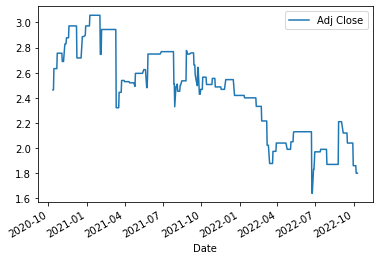

In [441]:
#Plot the Adj Close section of the dataset
UR_adj_close = UR_stocks[['Adj Close']]
UR_adj_close.plot()

In [446]:
import numpy as np
import matplotlib.pyplot as plt

#Getting the values of Adj Close
cls = UR_stocks[['Adj Close']]
adj_cls = cls.values
adj_cls

array([[2.46277761],
       [2.46277761],
       [2.63262415],
       [2.63262415],
       [2.63262415],
       [2.63262415],
       [2.63262415],
       [2.63262415],
       [2.7552917 ],
       [2.7552917 ],
       [2.7552917 ],
       [2.7552917 ],
       [2.7552917 ],
       [2.7552917 ],
       [2.7552917 ],
       [2.7552917 ],
       [2.68923974],
       [2.68923974],
       [2.68923974],
       [2.68923974],
       [2.82134318],
       [2.83077884],
       [2.83077884],
       [2.83077884],
       [2.87795854],
       [2.87795854],
       [2.87795854],
       [2.87795854],
       [2.97231817],
       [2.97231817],
       [2.97231817],
       [2.97231817],
       [2.97231817],
       [2.97231817],
       [2.97231817],
       [2.97231817],
       [2.97231817],
       [2.97231817],
       [2.97231817],
       [2.97231817],
       [2.71754789],
       [2.71754789],
       [2.71754789],
       [2.71754789],
       [2.71754789],
       [2.71754789],
       [2.71754789],
       [2.717

In [447]:
#ds
#plt.plot(ds)

In [448]:
#Preparing the Data through Transformation
#Use the MinMaxScaler to normalize data between 0 and 1
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler(feature_range=(0,1))
ac_scaled = normalizer.fit_transform(np.array(adj_cls).reshape(-1,1))
#ds_scaled = normalizer.fit_transform(np.array(adj_cls).reshape(-1,1))

In [449]:
#Identify the sizes of training and testing data
train_size = int(len(ac_scaled)*0.70)
test_size = len(ac_scaled) - train_size
train_size, test_size

(352, 151)

In [452]:
#Split the training and testing data
ac_train, ac_test = ac_scaled[0:train_size,:], ac_scaled[train_size:len(ac_scaled),:1]

In [453]:
#create a time series for GRU model 
#X[100,120,140,160,180] : Y[200]
def create_ac(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [16]:
#len(ac_train),len(ac_test)

In [459]:
#100 days price was chosen as one record for training
time_stamp = 100
X_train, y_train = create_ac(ac_train,time_stamp)
X_test, y_test = create_ac(ac_test,time_stamp)

In [460]:
X_train.shape, y_train.shape

((251, 100), (251,))

In [461]:
X_test.shape, y_test.shape

((50, 100), (50,))

In [462]:
#Reshape the data to fit into the GRU model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [504]:
#Choosing a model
#Gated Current Unit (GRU) will be used used

from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.layers import GRU

model = Sequential()

# Input layer
model.add(GRU (70, return_sequences=True, input_shape = [X_train.shape[1], X_train.shape[2]]))
model.add(Dropout(0.2)) 
    
# Hidden layer
model.add(GRU(70)) 
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_56 (GRU)                (None, 100, 70)           15330     
                                                                 
 dropout_56 (Dropout)        (None, 100, 70)           0         
                                                                 
 gru_57 (GRU)                (None, 70)                29820     
                                                                 
 dropout_57 (Dropout)        (None, 70)                0         
                                                                 
 dense_28 (Dense)            (None, 1)                 71        
                                                                 
Total params: 45,221
Trainable params: 45,221
Non-trainable params: 0
_________________________________________________________________


In [505]:
#Compile the model
model.compile(optimizer='adam',loss='mse')

In [506]:
#Fit the model
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=70,batch_size=64)

Epoch 1/70
4/4 [==============================] - 35s 1s/step - loss: 0.0180 - val_loss: 0.1116
Epoch 2/70
4/4 [==============================] - 1s 335ms/step - loss: 0.0093 - val_loss: 0.1389
Epoch 3/70
4/4 [==============================] - 1s 323ms/step - loss: 0.0108 - val_loss: 0.1287
Epoch 4/70
4/4 [==============================] - 1s 336ms/step - loss: 0.0083 - val_loss: 0.1117
Epoch 5/70
4/4 [==============================] - 1s 332ms/step - loss: 0.0087 - val_loss: 0.1041
Epoch 6/70
4/4 [==============================] - 1s 336ms/step - loss: 0.0091 - val_loss: 0.1056
Epoch 7/70
4/4 [==============================] - 1s 342ms/step - loss: 0.0084 - val_loss: 0.1105
Epoch 8/70
4/4 [==============================] - 1s 345ms/step - loss: 0.0081 - val_loss: 0.1128
Epoch 9/70
4/4 [==============================] - 1s 342ms/step - loss: 0.0081 - val_loss: 0.1091
Epoch 10/70
4/4 [==============================] - 1s 337ms/step - loss: 0.0079 - val_loss: 0.1029
Epoch 11/70
4/4 [====

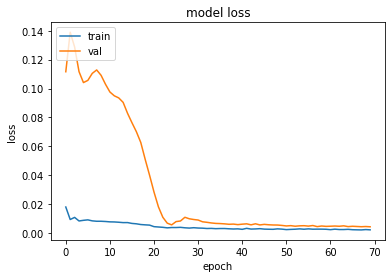

In [507]:
#Evaluation of the model
#Plotting the loss in training and validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [512]:
#Testing the model
#Prediction of future Adj Close value for URC using train and test datas
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

2/2 [==============================] - 0s 43ms/step


In [513]:
#Get the Inverse transform of the predicted train and test data to get the actual predicted values
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

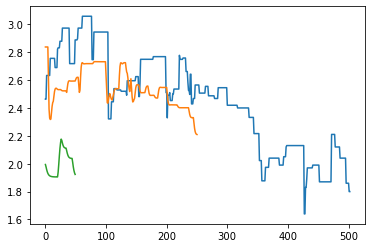

In [514]:
#Compare the plot of train, test and the current values
plt.plot(normalizer.inverse_transform(ac_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [515]:
#Combine the predicted train and test datas
test = np.vstack((train_predict,test_predict))

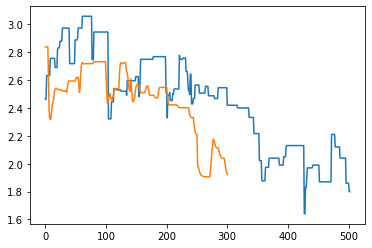

In [516]:
#Data visualization of the combined datas
plt.plot(normalizer.inverse_transform(ac_scaled))
plt.plot(test)

In [517]:
len(ds_test)

151

In [518]:
#Get the data of the last 100 days
fut_inp = ds_test[51:]
fut_inp = fut_inp.reshape(1,-1)
tmp_inp = list(fut_inp)
fut_inp.shape

(1, 100)

In [519]:
#List the given data
tmp_inp = tmp_inp[0].tolist()

In [520]:
#Predict the price in the next 10 days
lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.18172307312488556], [0.18086867034435272], [0.18328233063220978], [0.18693822622299194], [0.1909136325120926], [0.19482703506946564], [0.19854852557182312], [0.20205114781856537], [0.20534317195415497], [0.2084406167268753]]


In [521]:
#Get the inverse transform of the output
output=normalizer.inverse_transform(lst_output)

In [526]:
len(ac_scaled[403:]), len(lst_output)

(100, 10)

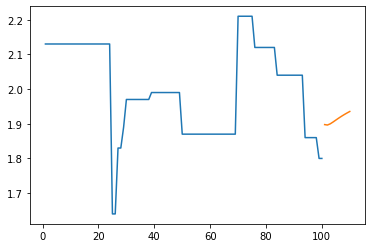

In [529]:
plot_new=np.arange(1,101)
plot_pred=np.arange(101,111)
plt.plot(plot_new, normalizer.inverse_transform(ac_scaled[403:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

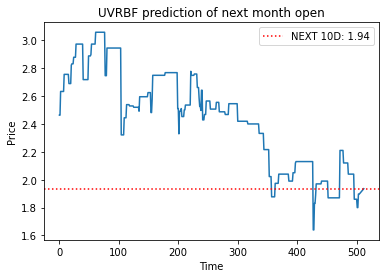

In [532]:
#Plot the final graph for the prediction after 10 days

ac_new = ac_scaled.tolist()
ac_new.extend(lst_output)
final_graph = normalizer.inverse_transform(ac_new).tolist()

plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of Adj Close".format(UR_corp))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 10D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()

In [533]:
output

array([[1.89754546],
       [1.89633456],
       [1.8997553 ],
       [1.90493659],
       [1.9105707 ],
       [1.91611694],
       [1.92139119],
       [1.92635525],
       [1.93102084],
       [1.93541067]])

In [523]:
score = model.evaluate(X_test, y_test)
print('Score: {}'.format(score))

2/2 [==============================] - 0s 40ms/step - loss: 0.0043
Score: 0.004266451112926006


In [525]:
#Compiled predictions with dates
import pandas as pd

data = {'Adj_Close': output}
final = pd.DataFrame(data=output)
final.columns = ["Adj_Close"]
Date = ["10-11-2022","10-12-2022","10-13-2022","10-14-2022","10-15-2022","10-16-2022",
        "10-17-2022","10-18-2022","10-19-2022","10-20-2022"]

final.insert(loc=1,column="Date", value=Date)
print("Predicted Stock prices for URC:\n\n",df[0:10],"\n")

Predicted Stock prices for URC:

    Adj_Close        Date
0   1.897545  10-11-2022
1   1.896335  10-12-2022
2   1.899755  10-13-2022
3   1.904937  10-14-2022
4   1.910571  10-15-2022
5   1.916117  10-16-2022
6   1.921391  10-17-2022
7   1.926355  10-18-2022
8   1.931021  10-19-2022
9   1.935411  10-20-2022 



In [534]:
#Uploading the forecast to csv
import csv
final.to_csv("bive_urc_forecast.csv")